In [1]:
pip install pandas numpy matplotlib seaborn scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [31]:

# 1. Load Dataset
url = r"D:\SMESTER5\Latest Football  Players 2024 Data.csv"  # Ganti dengan path ke dataset kamu
data = pd.read_csv("Latest Football  Players 2024 Data.csv")

In [33]:
# 2. Prabaca Data
print(data.head())
print(data.info())

        Teams    Seasons       Players  Matches  Goals  Assists  \
0  InterMiami       2024  Lionel Messi       15     14       11   
1  InterMiami       2023  Lionel Messi       14     11        5   
2         PSG  2022/2023  Lionel Messi       41     21       20   
3         PSG  2021/2022  Lionel Messi       34     11       14   
4   Barcelona  2020/2021  Lionel Messi       47     38       12   

   Seasons Ratings  
0              8.5  
1              8.0  
2              8.1  
3              7.9  
4              8.4  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1216 entries, 0 to 1215
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Teams            1216 non-null   object 
 1   Seasons          1216 non-null   object 
 2   Players          1216 non-null   object 
 3   Matches          1216 non-null   int64  
 4   Goals            1216 non-null   int64  
 5   Assists          1216 non-null   int64

In [39]:
# 2. Tampilkan Nama Kolom
print("Nama Kolom dalam Dataset:")
print(data.columns)


Nama Kolom dalam Dataset:
Index(['Teams', 'Seasons', 'Players', 'Matches', 'Goals', 'Assists',
       'Seasons Ratings'],
      dtype='object')


In [41]:
# 2. Hitung Statistik
total_seasons = data['Seasons'].nunique()  # Hitung jumlah musim unik
total_players = data['Players'].nunique()  # Hitung jumlah pemain unik
total_matches = data['Matches'].nunique()  # Hitung jumlah pertandingan unik
total_goals = data['Goals'].sum()  # Hitung total gol
total_assists = data['Assists'].sum()  # Hitung total assist
average_rating = data['Seasons Ratings'].mean()  # Hitung rata-rata rating

In [43]:
# 3. Cetak Hasil
print(f'Total Seasons: {total_seasons}')
print(f'Total Players: {total_players}')
print(f'Total Matches: {total_matches}')
print(f'Total Goals: {total_goals}')
print(f'Total Assists: {total_assists}')
print(f'Average Ratings: {average_rating:.2f}')

Total Seasons: 15
Total Players: 167
Total Matches: 59
Total Goals: 9800
Total Assists: 5834
Average Ratings: 7.11


In [45]:
# 4. Visualisasi
# Menyiapkan data untuk visualisasi
stats = {
    'Total Seasons': total_seasons,
    'Total Players': total_players,
    'Total Matches': total_matches,
    'Total Goals': total_goals,
    'Total Assists': total_assists,
    'Average Ratings': average_rating
}

In [49]:

# Mengubah data menjadi DataFrame
stats_df = pd.DataFrame(list(stats.items()), columns=['Statistic', 'Value'])

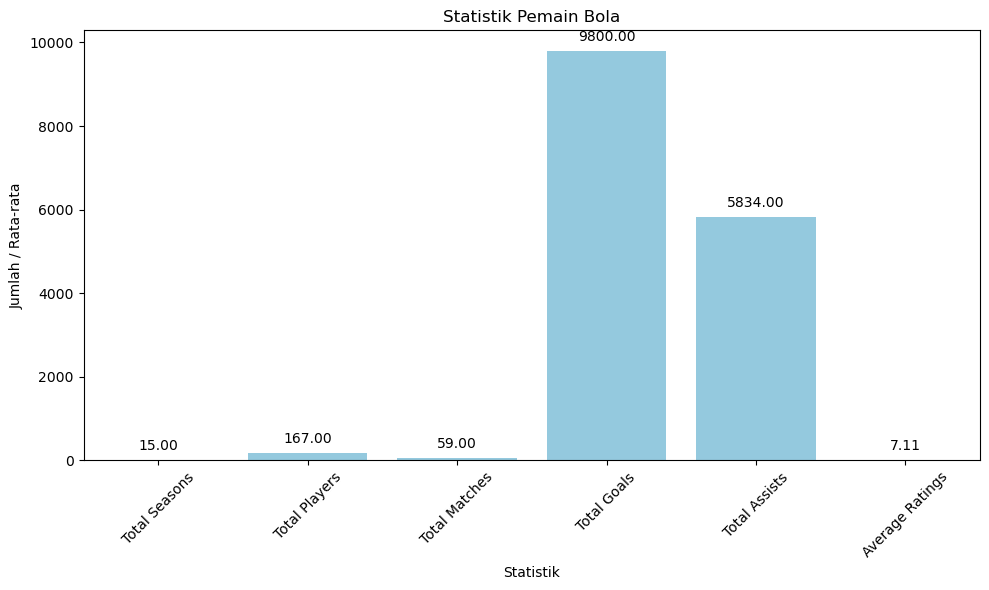

In [55]:
# Membuat diagram batang
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='Statistic', y='Value', data=stats_df, color='skyblue')
plt.title('Statistik Pemain Bola')
plt.xticks(rotation=45)
plt.ylabel('Jumlah / Rata-rata')
plt.xlabel('Statistik')

# Menambahkan angka di atas batang
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height():.2f}', 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', va='bottom', 
                      fontsize=10, color='black', 
                      xytext=(0, 5),  # Jarak dari batang
                      textcoords='offset points')

plt.tight_layout()
plt.show()

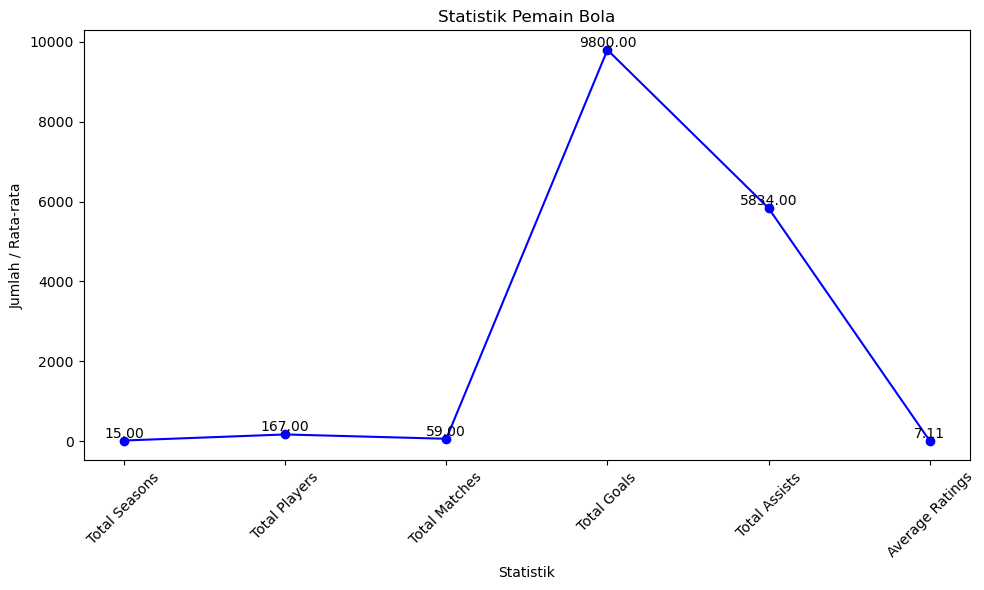

In [59]:
# 4. Menyiapkan Data untuk Diagram Garis
stats = {
    'Total Seasons': total_seasons,
    'Total Players': total_players,
    'Total Matches': total_matches,
    'Total Goals': total_goals,
    'Total Assists': total_assists,
    'Average Ratings': average_rating
}

# Mengubah data menjadi DataFrame
stats_df = pd.DataFrame(list(stats.items()), columns=['Statistic', 'Value'])

# Membuat Diagram Garis
plt.figure(figsize=(10, 6))
plt.plot(stats_df['Statistic'], stats_df['Value'], marker='o', linestyle='-', color='b')
plt.title('Statistik Pemain Bola')
plt.xticks(rotation=45)
plt.ylabel('Jumlah / Rata-rata')
plt.xlabel('Statistik')

# Menambahkan nilai di titik-titik
for i, value in enumerate(stats_df['Value']):
    plt.text(i, value, f'{value:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [65]:
# 2. Filter Data untuk Real Madrid
real_madrid_data = data[data['Teams'] == 'Real Madrid']

In [67]:
# 3. Hitung Statistik
total_matches = real_madrid_data['Matches'].nunique()  # Total pertandingan
total_goals = real_madrid_data['Goals'].sum()  # Total gol
total_assists = real_madrid_data['Assists'].sum()  # Total assist
average_rating = real_madrid_data['Seasons Ratings'].mean()  # Rata-rata rating

In [71]:
# 5. Menampilkan Hasil
print(f"Statistik Real Madrid:")
print(f"Total Pertandingan: {total_matches}")
print(f"Total Gol: {total_goals}")
print(f"Total Assist: {total_assists}")
print(f"Rata-rata Rating: {average_rating:.2f}")
print(f"Total Kemenangan: {wins}")

Statistik Real Madrid:
Total Pertandingan: 34
Total Gol: 640
Total Assist: 369
Rata-rata Rating: 7.20
Total Kemenangan: 0


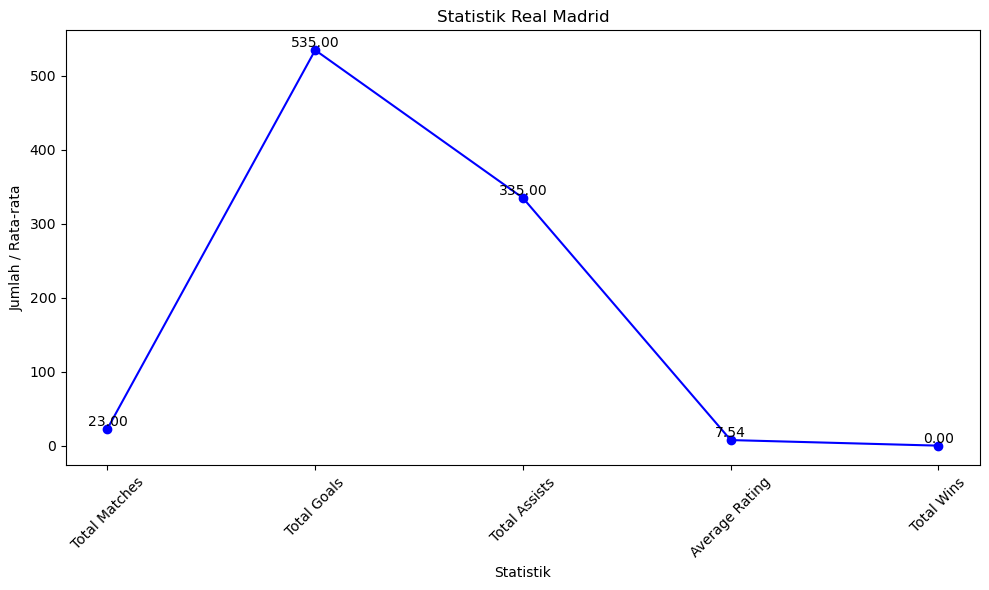

In [79]:
# 5. Menyiapkan Data untuk Diagram Garis
statistics = {
    'Total Matches': total_matches,
    'Total Goals': total_goals,
    'Total Assists': total_assists,
    'Average Rating': average_rating,
    'Total Wins': wins
}

# Mengubah data menjadi DataFrame
stats_df = pd.DataFrame(list(statistics.items()), columns=['Statistic', 'Value'])

# 6. Membuat Diagram Garis
plt.figure(figsize=(10, 6))
plt.plot(stats_df['Statistic'], stats_df['Value'], marker='o', linestyle='-', color='b')
plt.title('Statistik Real Madrid')
plt.xticks(rotation=45)
plt.ylabel('Jumlah / Rata-rata')
plt.xlabel('Statistik')

# Menambahkan nilai di titik-titik
for i, value in enumerate(stats_df['Value']):
    plt.text(i, value, f'{value:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [73]:
# 2. Filter Data untuk PSG
psg_data = data[data['Teams'] == 'PSG']

In [75]:
# 3. Hitung Statistik
total_matches = psg_data['Matches'].nunique()  # Total pertandingan
total_goals = psg_data['Goals'].sum()  # Total gol
total_assists = psg_data['Assists'].sum()  # Total assist
average_rating = psg_data['Seasons Ratings'].mean()  # Rata-rata rating


In [77]:
# 5. Menampilkan Hasil
print(f"Statistik Paris Saint-Germain (PSG):")
print(f"Total Pertandingan: {total_matches}")
print(f"Total Gol: {total_goals}")
print(f"Total Assist: {total_assists}")
print(f"Rata-rata Rating: {average_rating:.2f}")
print(f"Total Kemenangan: {wins}")

Statistik Paris Saint-Germain (PSG):
Total Pertandingan: 23
Total Gol: 535
Total Assist: 335
Rata-rata Rating: 7.54
Total Kemenangan: 0


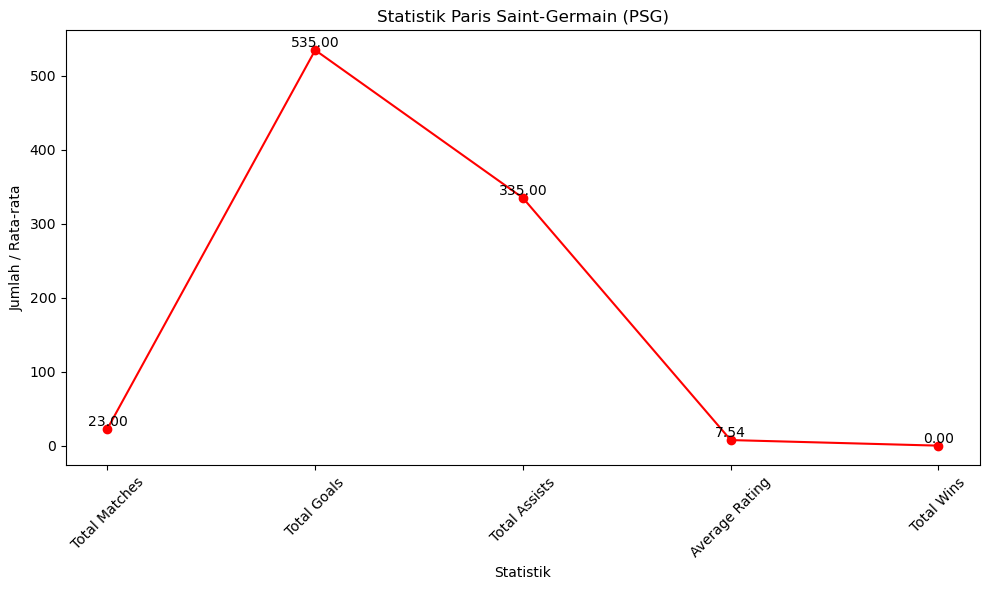

In [81]:
# 5. Menyiapkan Data untuk Diagram Garis
statistics = {
    'Total Matches': total_matches,
    'Total Goals': total_goals,
    'Total Assists': total_assists,
    'Average Rating': average_rating,
    'Total Wins': wins
}

# Mengubah data menjadi DataFrame
stats_df = pd.DataFrame(list(statistics.items()), columns=['Statistic', 'Value'])

# 6. Membuat Diagram Garis
plt.figure(figsize=(10, 6))
plt.plot(stats_df['Statistic'], stats_df['Value'], marker='o', linestyle='-', color='r')
plt.title('Statistik Paris Saint-Germain (PSG)')
plt.xticks(rotation=45)
plt.ylabel('Jumlah / Rata-rata')
plt.xlabel('Statistik')

# Menambahkan nilai di titik-titik
for i, value in enumerate(stats_df['Value']):
    plt.text(i, value, f'{value:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [83]:
# 2. Filter Data untuk Lionel Messi
messi_data = data[data['Players'] == 'Lionel Messi']  # Ganti 'Players' dengan kolom yang sesuai jika perlu

# 3. Mendapatkan Klub yang Pernah Dimainkan
clubs_played = messi_data['Teams'].unique()  # Mendapatkan klub unik

# 4. Menampilkan Hasil
print("Klub yang pernah dimainakan oleh Lionel Messi:")
for club in clubs_played:
    print(club)

Klub yang pernah dimainakan oleh Lionel Messi:
InterMiami
PSG
Barcelona


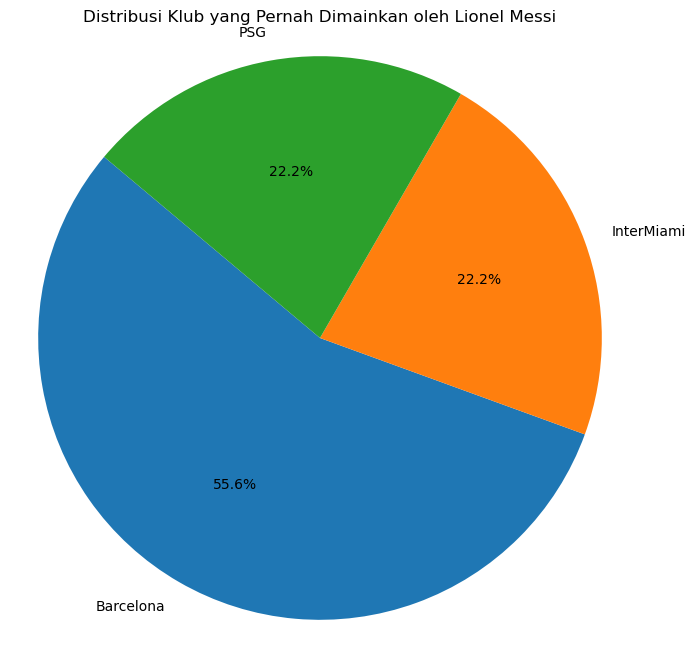

In [89]:
# 2. Filter Data untuk Lionel Messi
messi_data = data[data['Players'] == 'Lionel Messi']  # Ganti 'Players' dengan kolom yang sesuai jika perlu

# 3. Mendapatkan Klub yang Pernah Dimainkan
clubs_played = messi_data['Teams'].value_counts()  # Menghitung jumlah penampilan di setiap klub

# 4. Membuat Diagram Lingkaran
plt.figure(figsize=(8, 8))
plt.pie(clubs_played, labels=clubs_played.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribusi Klub yang Pernah Dimainkan oleh Lionel Messi')
plt.axis('equal')  # Untuk membuat lingkaran

# 5. Menampilkan Diagram
plt.show()

In [99]:
# 2. Filter Data untuk Lionel Messi
messi_data = data[data['Players'] == 'Lionel Messi']  # Ganti 'Players' dengan kolom yang sesuai jika perlu

# 3. Hitung Total Gol, Jumlah Pertandingan, dan Total Assist
total_goals = messi_data['Goals'].sum()        # Menghitung total gol
total_matches = messi_data['Matches'].nunique()  # Menghitung jumlah pertandingan unik
total_assists = messi_data['Assists'].sum()    # Menghitung total assist

# 4. Menampilkan Hasil
print(f"Total gol yang dicetak oleh Lionel Messi: {total_goals}")
print(f"Jumlah pertandingan yang diikuti oleh Lionel Messi: {total_matches}")
print(f"Total assist yang diberikan oleh Lionel Messi: {total_assists}")

Total gol yang dicetak oleh Lionel Messi: 276
Jumlah pertandingan yang diikuti oleh Lionel Messi: 9
Total assist yang diberikan oleh Lionel Messi: 140


In [85]:
# 2. Filter Data untuk Neymar
neymar_data = data[data['Players'] == 'Neymar']  # Ganti 'Players' dengan kolom yang sesuai jika perlu

# 3. Mendapatkan Klub yang Pernah Dimainkan
clubs_played = neymar_data['Teams'].unique()  # Mendapatkan klub unik

# 4. Menampilkan Hasil
print("Klub yang pernah dimainakan oleh Neymar:")
for club in clubs_played:
    print(club)

Klub yang pernah dimainakan oleh Neymar:
AL Hilal
PSG
Barcelona


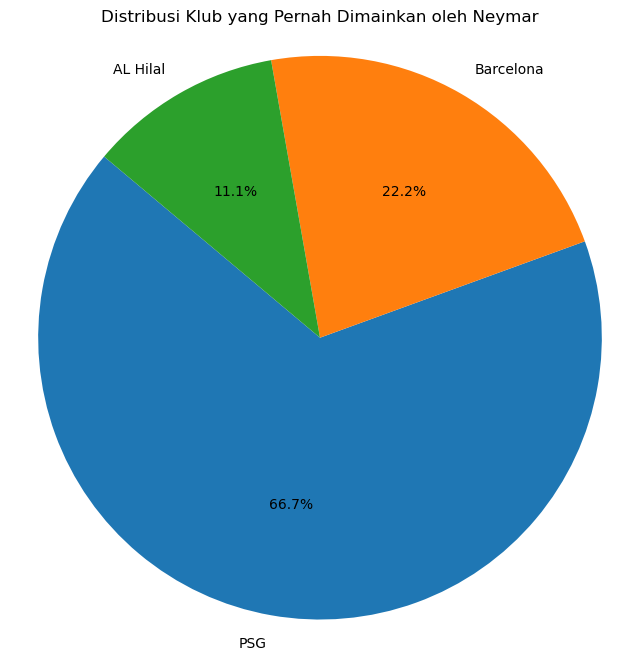

In [93]:
# 2. Filter Data untuk Neymar
neymar_data = data[data['Players'] == 'Neymar']  # Ganti 'Players' dengan kolom yang sesuai jika perlu

# 3. Mendapatkan Klub yang Pernah Dimainkan
clubs_played = neymar_data['Teams'].value_counts()  # Menghitung jumlah penampilan di setiap klub

# 4. Membuat Diagram Lingkaran
plt.figure(figsize=(8, 8))
plt.pie(clubs_played, labels=clubs_played.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribusi Klub yang Pernah Dimainkan oleh Neymar')
plt.axis('equal')  # Untuk membuat lingkaran

# 5. Menampilkan Diagram
plt.show()

In [101]:
# 2. Filter Data untuk Neymar
neymar_data = data[data['Players'] == 'Neymar']  # Ganti 'Players' dengan kolom yang sesuai jika perlu

# 3. Hitung Total Gol, Jumlah Pertandingan, dan Total Assist
total_goals = neymar_data['Goals'].sum()        # Menghitung total gol
total_matches = neymar_data['Matches'].nunique()  # Menghitung jumlah pertandingan unik
total_assists = neymar_data['Assists'].sum()    # Menghitung total assist

# 4. Menampilkan Hasil
print(f"Total gol yang dicetak oleh Neymar: {total_goals}")
print(f"Jumlah pertandingan yang diikuti oleh Neymar: {total_matches}")
print(f"Total assist yang diberikan oleh Neymar: {total_assists}")

Total gol yang dicetak oleh Neymar: 170
Jumlah pertandingan yang diikuti oleh Neymar: 8
Total assist yang diberikan oleh Neymar: 111


In [87]:
# 2. Filter Data untuk Cristiano Ronaldo
ronaldo_data = data[data['Players'] == 'Cristiano Ronaldo']  # Ganti 'Players' dengan kolom yang sesuai jika perlu

# 3. Mendapatkan Klub yang Pernah Dimainkan
clubs_played = ronaldo_data['Teams'].unique()  # Mendapatkan klub unik

# 4. Menampilkan Hasil
print("Klub yang pernah dimainakan oleh Cristiano Ronaldo:")
for club in clubs_played:
    print(club)

Klub yang pernah dimainakan oleh Cristiano Ronaldo:
AL Nassr
Man United
Juventus
Real Madrid


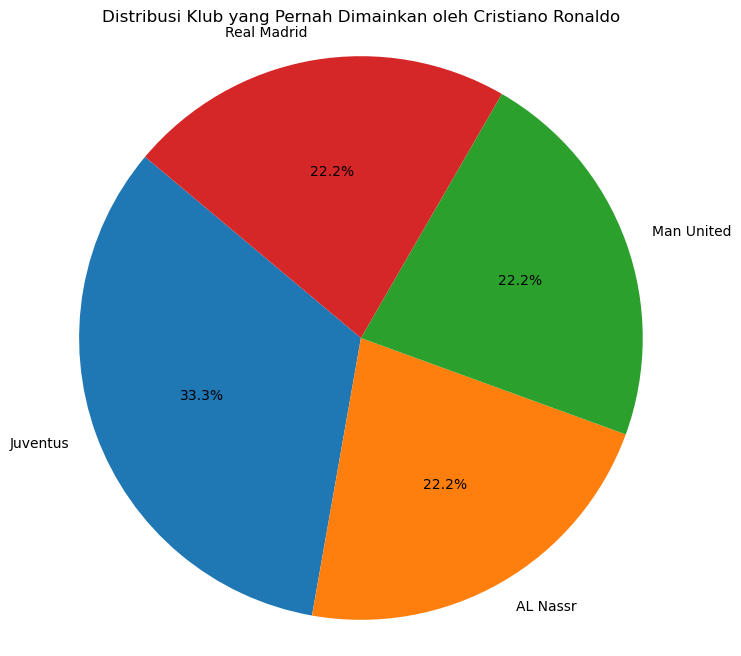

In [95]:
# 2. Filter Data untuk Cristiano Ronaldo
ronaldo_data = data[data['Players'] == 'Cristiano Ronaldo']  # Ganti 'Players' dengan kolom yang sesuai jika perlu

# 3. Mendapatkan Klub yang Pernah Dimainkan
clubs_played = ronaldo_data['Teams'].value_counts()  # Menghitung jumlah penampilan di setiap klub

# 4. Membuat Diagram Lingkaran
plt.figure(figsize=(8, 8))
plt.pie(clubs_played, labels=clubs_played.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribusi Klub yang Pernah Dimainkan oleh Cristiano Ronaldo')
plt.axis('equal')  # Untuk membuat lingkaran

# 5. Menampilkan Diagram
plt.show()

In [103]:
# 2. Filter Data untuk Cristiano Ronaldo
ronaldo_data = data[data['Players'] == 'Cristiano Ronaldo']  # Ganti 'Players' dengan kolom yang sesuai jika perlu

# 3. Hitung Total Gol, Jumlah Pertandingan, dan Total Assist
total_goals = ronaldo_data['Goals'].sum()        # Menghitung total gol
total_matches = ronaldo_data['Matches'].nunique()  # Menghitung jumlah pertandingan unik
total_assists = ronaldo_data['Assists'].sum()    # Menghitung total assist

# 4. Menampilkan Hasil
print(f"Total gol yang dicetak oleh Cristiano Ronaldo: {total_goals}")
print(f"Jumlah pertandingan yang diikuti oleh Cristiano Ronaldo: {total_matches}")
print(f"Total assist yang diberikan oleh Cristiano Ronaldo: {total_assists}")

Total gol yang dicetak oleh Cristiano Ronaldo: 248
Jumlah pertandingan yang diikuti oleh Cristiano Ronaldo: 9
Total assist yang diberikan oleh Cristiano Ronaldo: 61


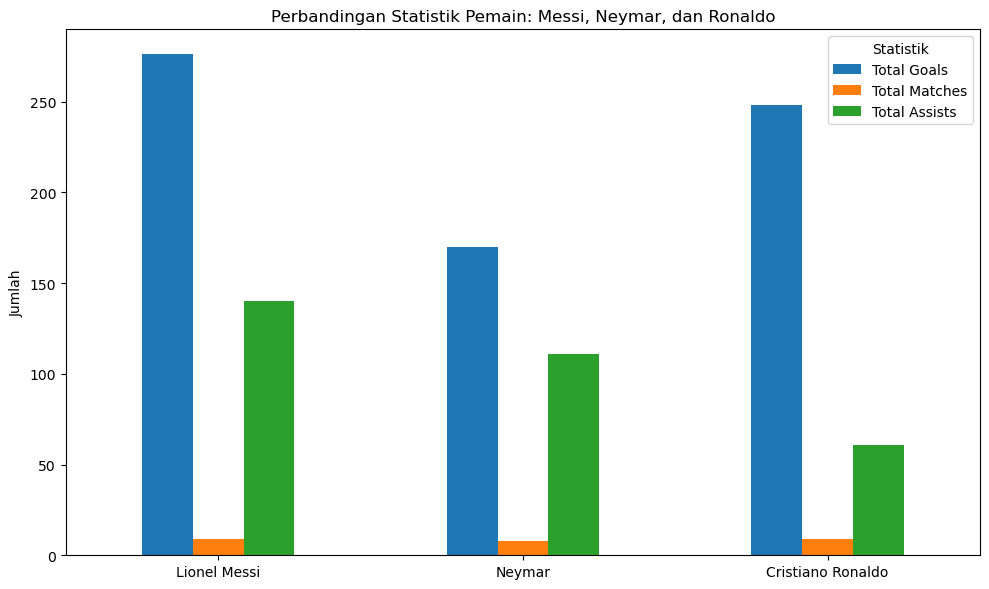

In [105]:
# 2. Mendapatkan Data untuk Pemain
players = ['Lionel Messi', 'Neymar', 'Cristiano Ronaldo']
statistics = {}

for player in players:
    player_data = data[data['Players'] == player]
    total_goals = player_data['Goals'].sum()
    total_matches = player_data['Matches'].nunique()
    total_assists = player_data['Assists'].sum()
    statistics[player] = [total_goals, total_matches, total_assists]

# 3. Membuat DataFrame untuk Statistik
stats_df = pd.DataFrame(statistics, index=['Total Goals', 'Total Matches', 'Total Assists']).T

# 4. Membuat Diagram Perbandingan
stats_df.plot(kind='bar', figsize=(10, 6))
plt.title('Perbandingan Statistik Pemain: Messi, Neymar, dan Ronaldo')
plt.ylabel('Jumlah')
plt.xticks(rotation=0)
plt.legend(title='Statistik')
plt.tight_layout()

# 5. Menampilkan Diagram
plt.show()